# WITH SEABORN

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [4]:
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.shape

(2535, 14)

In [8]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## 1a: Box plot of age in both genders separeted by manner of death.

In [10]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
239,252,Byron Herbert,29/03/15,shot,gun,29.0,M,B,Elizabethtown,KY,False,attack,Not fleeing,False
931,1078,Javario Shante Eagle,12/12/15,shot,gun and knife,24.0,M,B,Chattanooga,TN,False,attack,Not fleeing,False
2441,2720,TK TK,29/06/17,shot,undetermined,NaN,M,NaN,Burbank,CA,False,undetermined,Not fleeing,False
1301,1483,Demarcus Semer,23/04/16,shot,vehicle,21.0,M,B,Fort Pierce,FL,False,attack,Car,False
2506,2791,Farhad Jabbari,19/07/17,shot,unarmed,38.0,M,NaN,Saginaw,MI,False,attack,Not fleeing,False


In [9]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [15]:
kill.skew()

id                        -0.014277
age                        0.714931
signs_of_mental_illness    1.157208
body_camera                2.545901
dtype: float64

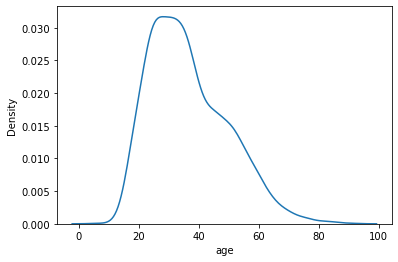

In [17]:
sns.kdeplot(kill.age);

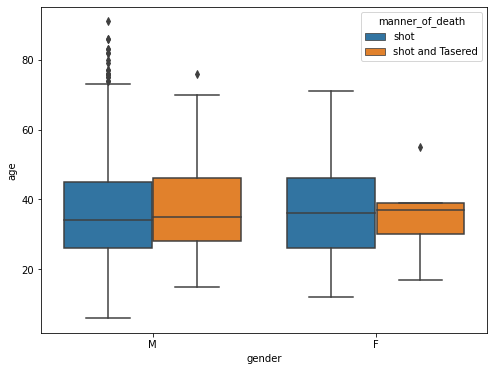

In [21]:
# with seaborn
plt.figure(figsize= (8,6))
sns.boxplot(kill.gender , kill.age , hue = kill["manner_of_death"]);

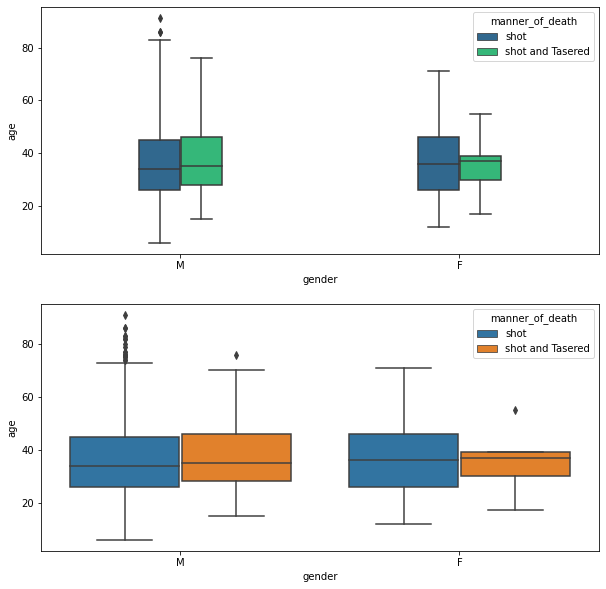

In [85]:
fig , (ax1,ax2) = plt.subplots(nrows=2 ,figsize = (10,10))
ax = sns.boxplot(kill.gender,kill.age,hue = kill.manner_of_death ,palette="viridis",saturation=1 ,width=0.3,whis=2, ax = ax1)
plt.title()
ax_other = sns.boxplot(kill.gender,kill.age,hue = kill.manner_of_death , ax = ax2)

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

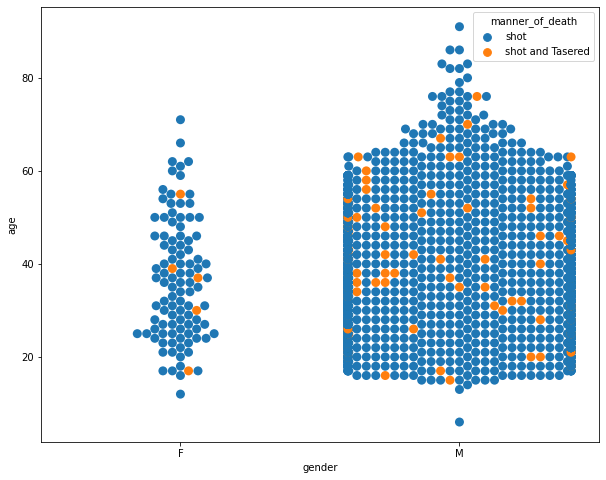

In [23]:
# with seaborn
fig , ax = plt.subplots(figsize = (10,8))
sns.swarmplot(x ="gender", y = "age" , hue = "manner_of_death", data = kill,order = ["F","M"],size=9);

## 2: Plot 12 most dangerous cities

In [27]:
city_freq =kill.city.value_counts()[:12]
city_freq

Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Austin          18
Miami           18
St. Louis       15
Tucson          14
Indianapolis    14
Name: city, dtype: int64

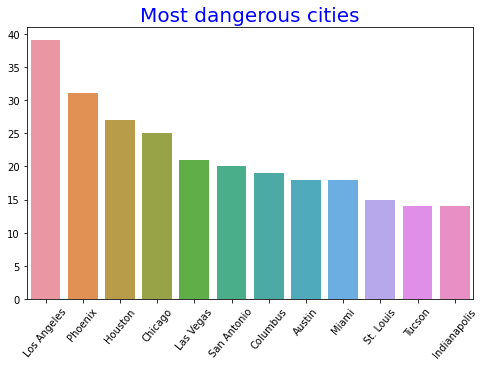

In [37]:
# with seaborn barplot
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(city_freq.index,
                city_freq.values)
ax.set_xticklabels(city_freq.index,rotation = 50);
ax.set_title("Most dangerous cities",color = "blue" , fontsize = 20);

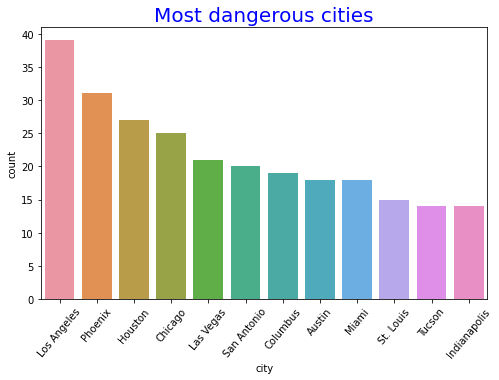

In [38]:
# with seaborn countplot
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot( x = "city"  , data = kill ,
                  order = city_freq.index)
ax.set_xticklabels(city_freq.index,rotation = 50);
ax.set_title("Most dangerous cities",color = "blue" , fontsize = 20);

## 3: Plot 20 most dangerous states

In [39]:
state_freq = kill.state.value_counts()[:20]
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

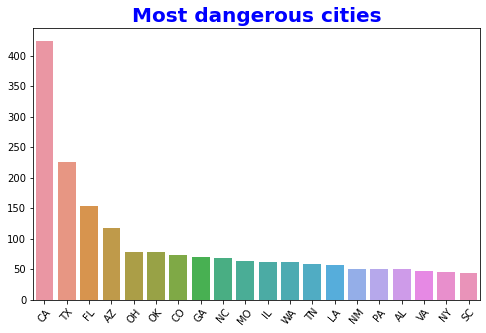

In [50]:
# with seaborn barplot
fig , ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(state_freq.index,state_freq.values)
ax.set_xticklabels(state_freq.index,rotation = 50);
ax.set_title("Most dangerous cities",color = "blue" , fontsize = 20,loc = "center", fontweight = "bold");

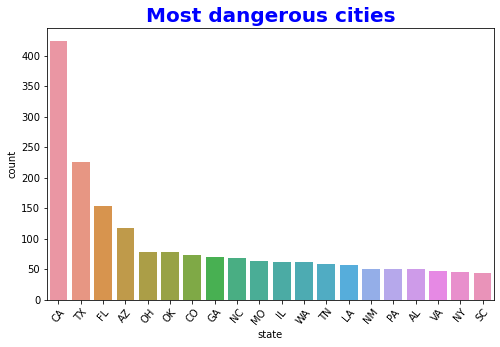

In [51]:
# with seaborn countplot
fig , ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x = "state", data = kill ,
                  order = state_freq.index)
ax.set_xticklabels(state_freq.index,rotation = 50);
ax.set_title("Most dangerous cities",color = "blue" , fontsize = 20,loc = "center", fontweight = "bold");

## 4: Plot Having mental ilness or not for killed people

In [53]:
kill.signs_of_mental_illness.value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

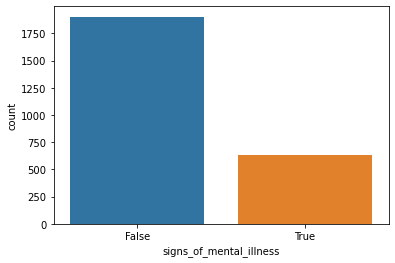

In [55]:
# with seaborn
sns.countplot(kill.signs_of_mental_illness);

<AxesSubplot:>

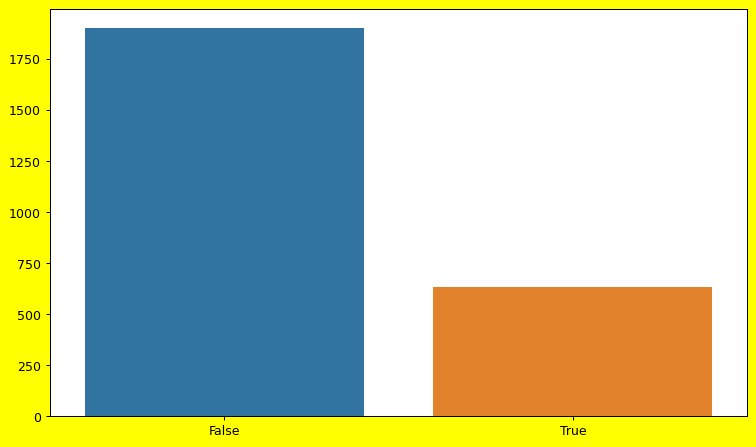

In [63]:
plt.figure(figsize = (10,6),dpi = 90 , facecolor="yellow")
sns.barplot(kill.signs_of_mental_illness.value_counts().index,
           kill.signs_of_mental_illness.value_counts().values,
           ci=None)

## 5: Plot number of Threat Types

In [65]:
kill.threat_level.value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

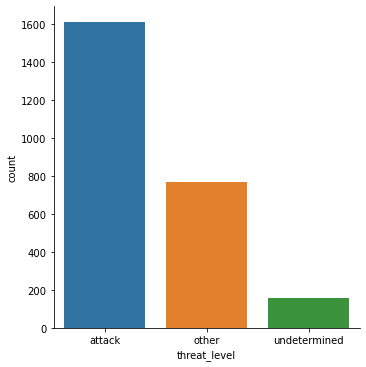

In [69]:
sns.catplot(x='threat_level', data=kill, kind='count');

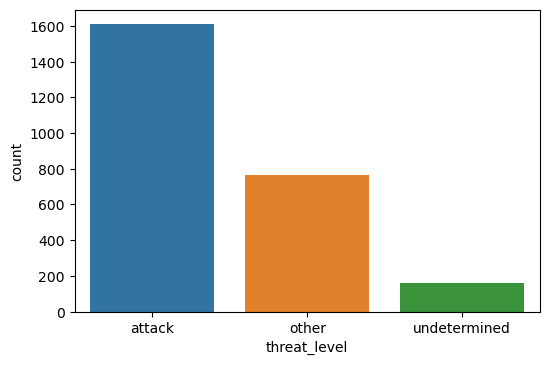

In [68]:
# with seaborn
plt.figure(dpi = 100)
sns.countplot(kill.threat_level);

## 6: Plot number of Flee Types

In [70]:
kill.flee.value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

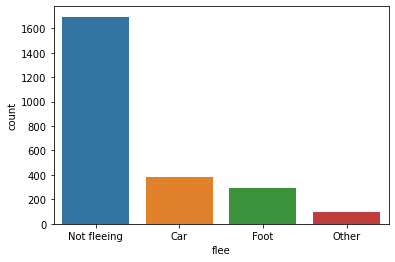

In [71]:
# with seaborn
sns.countplot(kill.flee);